In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
import PIL

### Building AlexNet's Model

In [2]:
num_classes = 2

model = tf.keras.Sequential([
    
    layers.Conv2D(96, 11, strides=4),
    layers.Activation('relu'),
    layers.MaxPooling2D(3, strides=2),
    
    layers.Conv2D(256, 5, padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(3, strides=2),
    
    layers.Conv2D(384, 3, padding='same'),
    layers.Activation('relu'),
    
    layers.Conv2D(384, 3, padding='same'),
    layers.Activation('relu'),
    
    layers.Conv2D(256, 3, padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(3, strides=2),
    
    layers.Flatten(),
    
    layers.Dense(9216),
    layers.Activation('relu'),
    
    layers.Dense(4096),
    layers.Activation('relu'),
    
    layers.Dense(4096),
    layers.Activation('relu'),
    
    layers.Dense(num_classes),
    layers.Activation('softmax')
])

In [3]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=SGD(lr=0.0001, momentum=0.9), metrics=['accuracy'])

### Dataset 1

In [4]:
train_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/ct-sub-datasets/train',
                                                               image_size=(227, 227),
                                                               batch_size=32,
                                                               label_mode='categorical')

val_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/ct-sub-datasets/val/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

test_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/ct-sub-datasets/test/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

Found 425 files belonging to 2 classes.
Found 118 files belonging to 2 classes.
Found 203 files belonging to 2 classes.


In [5]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 50,
    validation_data = val_ds,
    verbose=1,
)

model.save("./AlexNet_SGD_dataset_1")

Epoch 1/50
14/14 [==============================] - 3s 219ms/step - loss: 2.6304 - accuracy: 0.5271 - val_loss: 0.7588 - val_accuracy: 0.5085
Epoch 2/50
14/14 [==============================] - 2s 172ms/step - loss: 0.7659 - accuracy: 0.5671 - val_loss: 0.8538 - val_accuracy: 0.4915
Epoch 3/50
14/14 [==============================] - 2s 172ms/step - loss: 0.6200 - accuracy: 0.6494 - val_loss: 0.7996 - val_accuracy: 0.4831
Epoch 4/50
14/14 [==============================] - 2s 172ms/step - loss: 0.6503 - accuracy: 0.5741 - val_loss: 0.8904 - val_accuracy: 0.4831
Epoch 5/50
14/14 [==============================] - 2s 175ms/step - loss: 0.6241 - accuracy: 0.6612 - val_loss: 0.8639 - val_accuracy: 0.4831
Epoch 6/50
14/14 [==============================] - 2s 177ms/step - loss: 0.5572 - accuracy: 0.7012 - val_loss: 0.8756 - val_accuracy: 0.4831
Epoch 7/50
14/14 [==============================] - 2s 173ms/step - loss: 0.5232 - accuracy: 0.7318 - val_loss: 1.2098 - val_accuracy: 0.4915
Epoch 

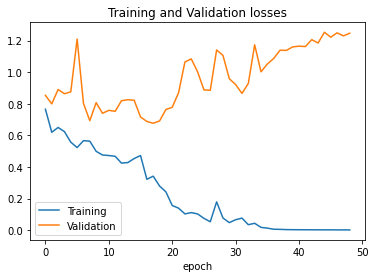

In [6]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("../project/AlexNet_SGD_ds_1.png")

In [7]:
model.evaluate(test_ds)

7/7 [==============================] - 0s 52ms/step - loss: 1.5759 - accuracy: 0.6601


[1.5758881568908691, 0.6600984930992126]

### Dataset 2

In [8]:
train_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/data-try2/train',
                                                               image_size=(227, 227),
                                                               batch_size=32,
                                                               label_mode='categorical')

val_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/data-try2/validation/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

test_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/data-try2/test/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

Found 612 files belonging to 2 classes.
Found 99 files belonging to 2 classes.
Found 91 files belonging to 2 classes.


In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 50,
    validation_data = val_ds,
    verbose=1,
)

model.save("./AlexNet_SGD_dataset_2")

Epoch 1/50
20/20 [==============================] - 3s 174ms/step - loss: 0.7271 - accuracy: 0.7582 - val_loss: 0.4827 - val_accuracy: 0.6869
Epoch 2/50
20/20 [==============================] - 2s 99ms/step - loss: 0.5395 - accuracy: 0.7304 - val_loss: 0.5231 - val_accuracy: 0.7071
Epoch 3/50
20/20 [==============================] - 2s 99ms/step - loss: 0.4460 - accuracy: 0.7794 - val_loss: 0.4325 - val_accuracy: 0.7677
Epoch 4/50
20/20 [==============================] - 2s 99ms/step - loss: 0.4094 - accuracy: 0.8007 - val_loss: 0.4094 - val_accuracy: 0.8182
Epoch 5/50
20/20 [==============================] - 2s 99ms/step - loss: 0.3449 - accuracy: 0.8366 - val_loss: 0.5175 - val_accuracy: 0.7677
Epoch 6/50
20/20 [==============================] - 2s 99ms/step - loss: 0.2364 - accuracy: 0.9085 - val_loss: 0.3449 - val_accuracy: 0.8485
Epoch 7/50
20/20 [==============================] - 2s 100ms/step - loss: 0.1771 - accuracy: 0.9281 - val_loss: 0.5928 - val_accuracy: 0.7576
Epoch 8/50


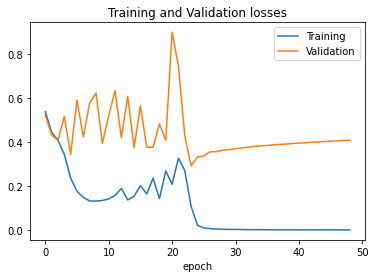

In [11]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("../project/AlexNet_SGD_ds_2.png")

In [12]:
model.evaluate(test_ds)

3/3 [==============================] - 0s 99ms/step - loss: 0.4346 - accuracy: 0.8791


[0.43457502126693726, 0.8791208863258362]

### Dataset 3

In [13]:
train_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/kaggle-large-ct/train/',
                                                               image_size=(227, 227),
                                                               validation_split=0.2,
                                                               subset="training",
                                                               seed=123,
                                                               batch_size=32,
                                                               label_mode='categorical')

val_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/kaggle-large-ct/train/',
                                                             image_size=(227, 227),
                                                             validation_split=0.2,
                                                             subset="validation",
                                                             seed=123,
                                                             batch_size=32,
                                                             label_mode='categorical')

test_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/kaggle-large-ct/test/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

Found 2233 files belonging to 2 classes.
Using 1787 files for training.
Found 2233 files belonging to 2 classes.
Using 446 files for validation.
Found 248 files belonging to 2 classes.


In [14]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 50,
    validation_data = val_ds,
    verbose=1,
)

model.save("./AlexNet_SGD_dataset_3")

Epoch 1/50
56/56 [==============================] - 12s 210ms/step - loss: 0.6512 - accuracy: 0.7112 - val_loss: 0.3705 - val_accuracy: 0.8363
Epoch 2/50
56/56 [==============================] - 11s 197ms/step - loss: 0.3218 - accuracy: 0.8663 - val_loss: 0.3504 - val_accuracy: 0.8386
Epoch 3/50
56/56 [==============================] - 11s 198ms/step - loss: 0.2474 - accuracy: 0.9054 - val_loss: 0.2419 - val_accuracy: 0.9058
Epoch 4/50
56/56 [==============================] - 11s 198ms/step - loss: 0.1869 - accuracy: 0.9250 - val_loss: 0.2382 - val_accuracy: 0.9013
Epoch 5/50
56/56 [==============================] - 11s 199ms/step - loss: 0.1384 - accuracy: 0.9502 - val_loss: 0.2196 - val_accuracy: 0.9126
Epoch 6/50
56/56 [==============================] - 11s 200ms/step - loss: 0.0779 - accuracy: 0.9787 - val_loss: 0.3085 - val_accuracy: 0.8879
Epoch 7/50
56/56 [==============================] - 11s 198ms/step - loss: 0.0502 - accuracy: 0.9899 - val_loss: 0.1923 - val_accuracy: 0.9260

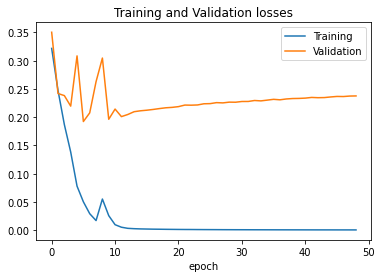

In [15]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("../project/AlexNet_SGD_ds_3.png")

In [16]:
model.evaluate(test_ds)

8/8 [==============================] - 0s 57ms/step - loss: 0.7531 - accuracy: 0.8387


[0.7530869245529175, 0.8387096524238586]

### Dataset 4

In [17]:
from keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_ds = training_datagen.flow_from_directory(r'../datasets/CovidDataset/Train',
                                                target_size=(227, 227),
                                                class_mode='categorical')

val_ds = test_datagen.flow_from_directory(r'../datasets/CovidDataset/Val/',
                                          target_size=(227, 227),
                                          class_mode='categorical')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [18]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 50,
    validation_data = val_ds,
    verbose=1,
)

model.save("./AlexNet_SGD_dataset_4")

Epoch 1/50
7/7 [==============================] - 9s 1s/step - loss: 0.6930 - accuracy: 0.4911 - val_loss: 0.6917 - val_accuracy: 0.4833
Epoch 2/50
7/7 [==============================] - 8s 1s/step - loss: 0.6926 - accuracy: 0.4777 - val_loss: 0.6911 - val_accuracy: 0.5333
Epoch 3/50
7/7 [==============================] - 8s 1s/step - loss: 0.6915 - accuracy: 0.5357 - val_loss: 0.6904 - val_accuracy: 0.5500
Epoch 4/50
7/7 [==============================] - 8s 1s/step - loss: 0.6913 - accuracy: 0.5625 - val_loss: 0.6897 - val_accuracy: 0.6000
Epoch 5/50
7/7 [==============================] - 8s 1s/step - loss: 0.6908 - accuracy: 0.6071 - val_loss: 0.6889 - val_accuracy: 0.7000
Epoch 6/50
7/7 [==============================] - 8s 1s/step - loss: 0.6898 - accuracy: 0.7143 - val_loss: 0.6882 - val_accuracy: 0.8000
Epoch 7/50
7/7 [==============================] - 8s 1s/step - loss: 0.6892 - accuracy: 0.7098 - val_loss: 0.6874 - val_accuracy: 0.8167
Epoch 8/50
7/7 [=========================

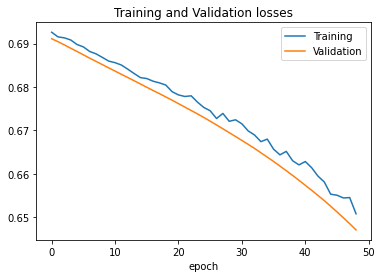

In [19]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("../project/AlexNet_SGD_ds_4.png")